# Star Light Analysis

Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

load csv

In [2]:
df = pd.read_csv('star_classification.csv')

In [3]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [4]:
df = df.dropna(subset=['u', 'g', 'r', 'i', 'z'])

- u = Ultraviolet filter in the photometric system
- g = Green filter in the photometric system
- r = Red filter in the photometric system
- i = Near Infrared filter in the photometric system
- z = Infrared filter in the photometric system

In [5]:
df['avg_magnitude'] = df[['u', 'g', 'r', 'i', 'z']].mean(axis=1)

In [6]:
# below_zero_mags = df[(df['u'] < 0) | (df['g'] < 0) | (df['r'] < 0) | (df['i'] < 0) | (df['z'] < 0)]
# print(below_zero_mags.head())

In [7]:
df[['u', 'g', 'r', 'i', 'z']] = df[['u', 'g', 'r', 'i', 'z']].apply(pd.to_numeric, errors='coerce')

In [8]:
df[['u', 'g', 'r', 'i', 'z']].dtypes

u    float64
g    float64
r    float64
i    float64
z    float64
dtype: object

In [9]:
df.describe(include=[float])

,obj_ID,alpha,delta,u,g,r,i,z,spec_obj_ID,redshift,avg_magnitude
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,5.783882e+18,0.576661,19.982256
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,3.324016e+18,0.730707,19.095231
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,2.995191e+17,-0.009971,-5992.163530
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,2.844138e+18,0.054517,18.619998
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,5.614883e+18,0.424173,20.555356
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,8.332144e+18,0.704154,21.418436
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,1.412694e+19,7.011245,27.542916


In [10]:
df.isnull().sum()

obj_ID           0
alpha            0
delta            0
u                0
g                0
r                0
i                0
z                0
run_ID           0
rerun_ID         0
cam_col          0
field_ID         0
spec_obj_ID      0
class            0
redshift         0
plate            0
MJD              0
fiber_ID         0
avg_magnitude    0
dtype: int64

In [11]:
c = 3e5  # speed of light in km/s
H0 = 70  # Hubble constant in km/s/Mpc

In [12]:
# Calculate distance in Mpc using the redshift values
df['distance_Mpc'] = (c * df['redshift']) / H0

# Display the updated DataFrame with distances
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID,avg_magnitude,distance_Mpc
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171,20.901714,2720.544000
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427,22.595260,3339.154286
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299,21.366712,2760.833571
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775,21.455928,3995.766857
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842,17.007330,497.668714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438,21.817732,0.000000
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866,20.940068,1735.264286
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74,18.737192,614.424000
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470,20.919836,1950.169714


In [38]:
print(df['class'].unique())

['GALAXY' 'QSO' 'STAR']


Mpc is megaparsecs

In [13]:
H0 = 70  
c = 3e5  
df['luminosity_distance_Mpc'] = df['distance_Mpc'] * (1 + df['redshift'])

In [14]:
df['absolute_magnitude'] = df['avg_magnitude'] - 5 * np.log10(df['luminosity_distance_Mpc'] * 1e6) + 5

/Users/tylerjackson/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tylerjackson/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [15]:
df['redshift_velocity_km_s'] = c * df['redshift']

In [16]:
df['peculiar_velocity_km_s'] = df['redshift_velocity_km_s'] - H0 * df['distance_Mpc']

In [17]:
df['lookback_time_Gyr'] = df['redshift'] / H0

In [18]:
df['angular_diameter_distance_Mpc'] = df['distance_Mpc'] / (1 + df['redshift'])

In [19]:
df['distance_modulus'] = df['avg_magnitude'] - df['absolute_magnitude']

In [20]:
M_sun = 4.83
L_sun = 3.828e26

In [21]:
df['luminosity_W'] = L_sun * 10 ** (0.4 * (M_sun - df['absolute_magnitude']))

In [22]:
df['comoving_distance_Mpc'] = (c / H0) * df['redshift']

In [23]:
galaxies_df = df[df['class'] == 'GALAXY']

In [24]:
print(galaxies_df.head())

         obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  ...  distance_Mpc  \
0  19.16573  18.79371    3606       301  ...   2720.544000   
1  21.16812  21.61427    4518       301  ...   3339.154286   
2  19.34857  18.94827    3606       301  ...   2760.833571   
3  20.50454  19.25010    4192       301  ...   3995.766857   
4  15.97711  15.54461    8102       301  ...    497.668714   

   luminosity_distance_Mpc  absolute_magnitude redshift_velocity_km_s  \
0              4447.527920          -22.338879              190438.08   
1              5940.809599          -21.273968  

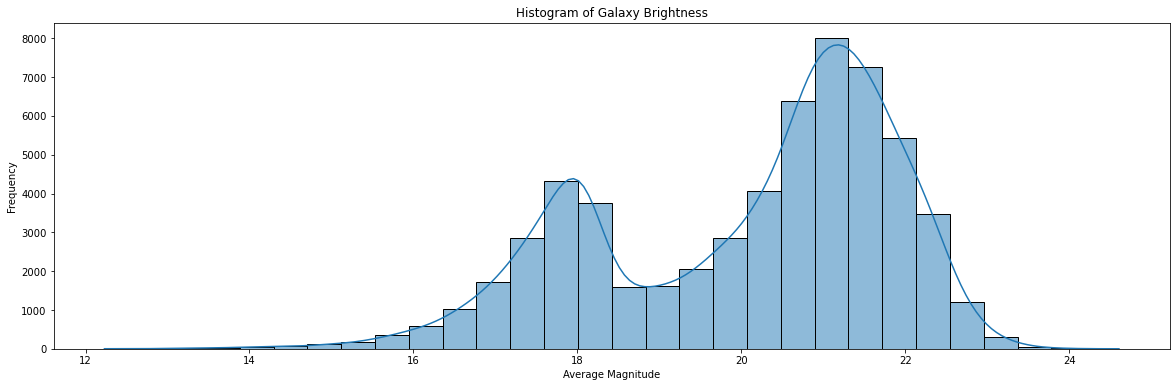

In [25]:
plt.figure(figsize=(20, 6))
sns.histplot(galaxies_df['avg_magnitude'], bins=30, kde=True)
plt.xlabel('Average Magnitude')
plt.ylabel('Frequency')
plt.title('Histogram of Galaxy Brightness')
plt.show()

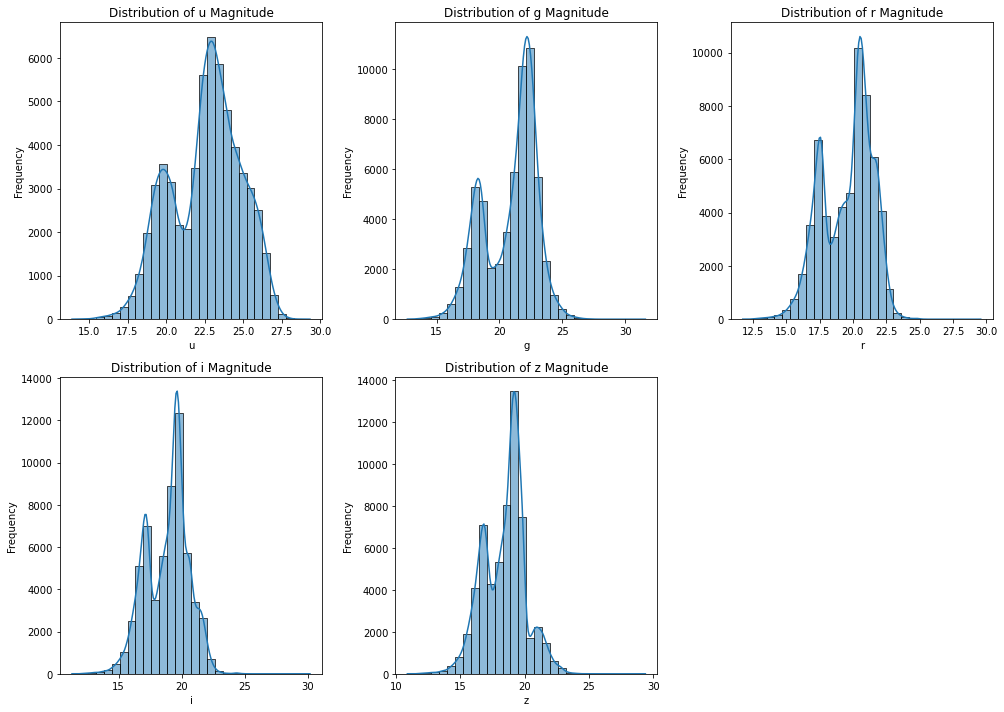

In [26]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(['u', 'g', 'r', 'i', 'z'], 1):
    plt.subplot(2, 3, i)
    sns.histplot(galaxies_df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col} Magnitude')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<Figure size 1008x720 with 0 Axes>

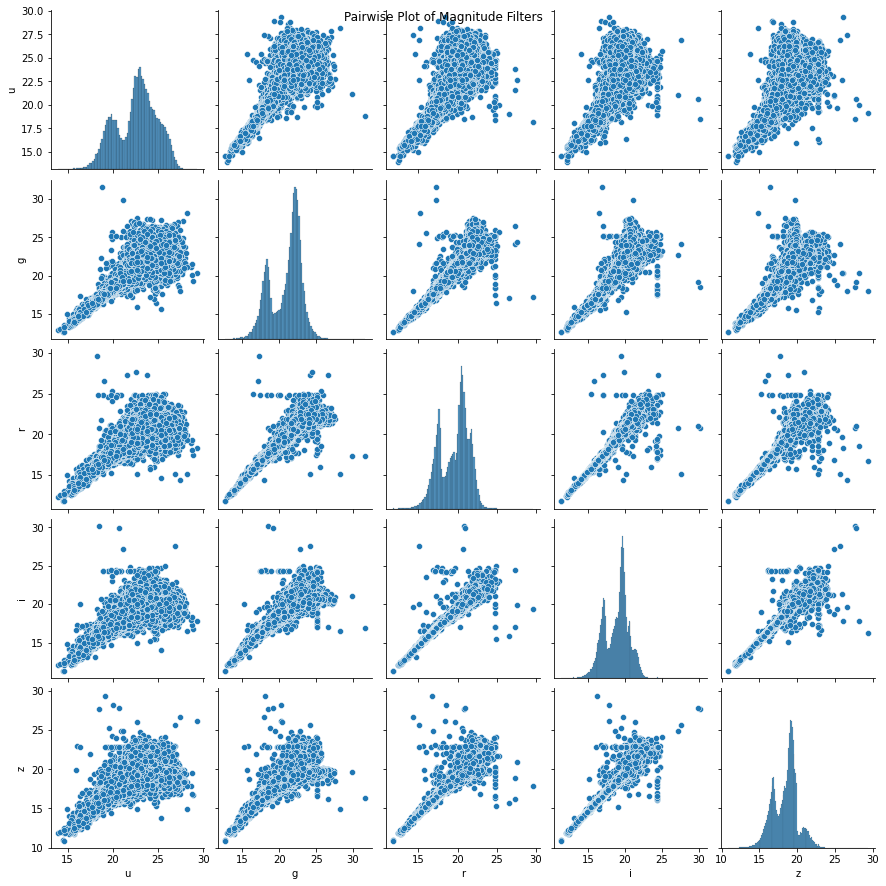

In [27]:
# Scatter plots to explore correlations between different magnitudes
plt.figure(figsize=(14, 10))
sns.pairplot(galaxies_df[['u', 'g', 'r', 'i', 'z']])
plt.suptitle('Pairwise Plot of Magnitude Filters')
plt.show()

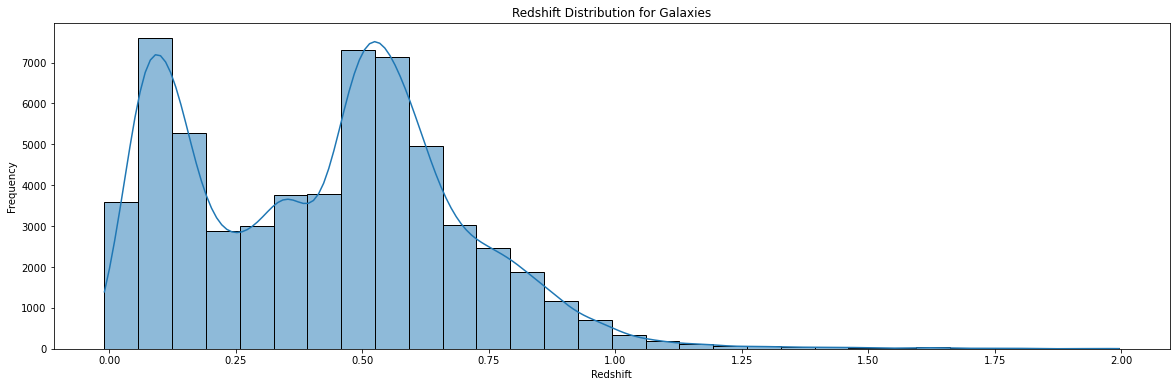

In [28]:
# Histogram of redshift values
plt.figure(figsize=(20, 6))
sns.histplot(galaxies_df['redshift'], bins=30, kde=True)
plt.xlabel('Redshift')
plt.ylabel('Frequency')
plt.title('Redshift Distribution for Galaxies')
plt.show()

In [29]:
# Compute correlation matrix
correlation_matrix = galaxies_df[['u', 'g', 'r', 'i', 'z']].corr()

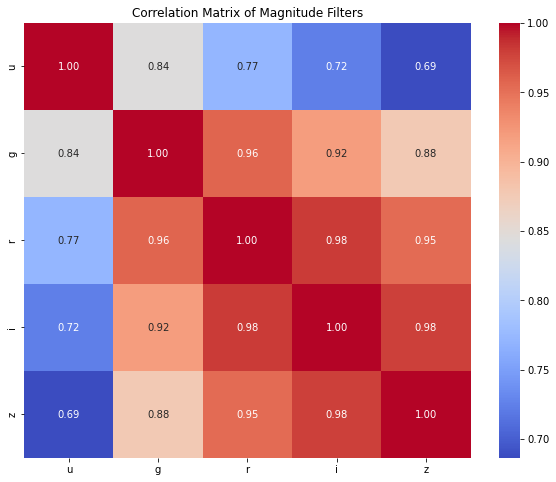

In [30]:
# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Magnitude Filters')
plt.show()

In [31]:
# Distribution of object classes
class_distribution = galaxies_df['class'].value_counts()

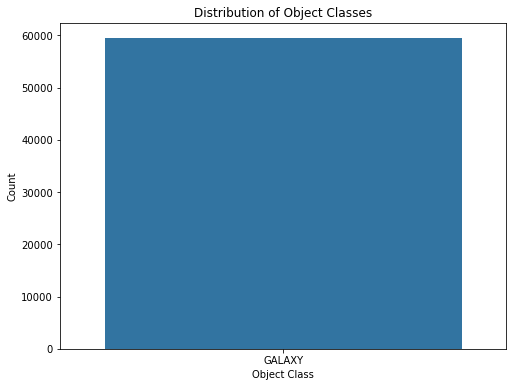

In [32]:
plt.figure(figsize=(8, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.xlabel('Object Class')
plt.ylabel('Count')
plt.title('Distribution of Object Classes')
plt.show()

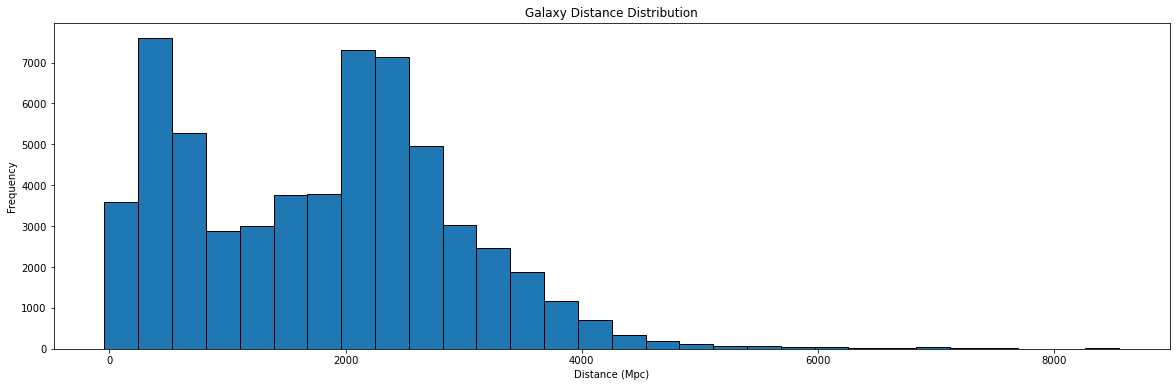

In [33]:
plt.figure(figsize=(20, 6))
plt.hist(galaxies_df['distance_Mpc'], bins=30, edgecolor='k')
plt.xlabel('Distance (Mpc)')
plt.ylabel('Frequency')
plt.title('Galaxy Distance Distribution')
plt.show()

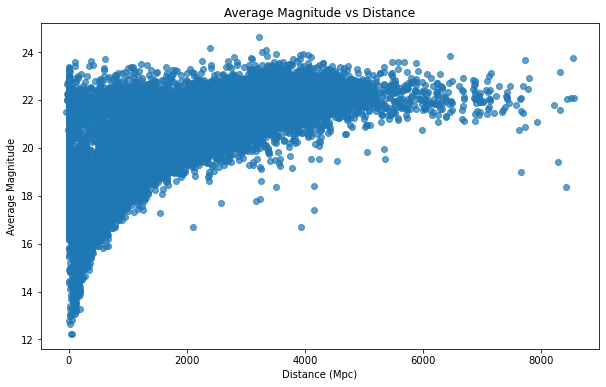

In [34]:
# Plot Average Magnitude vs Distance
plt.figure(figsize=(10, 6))
plt.scatter(galaxies_df['distance_Mpc'], galaxies_df['avg_magnitude'], alpha=0.7)
plt.xlabel('Distance (Mpc)')
plt.ylabel('Average Magnitude')
plt.title('Average Magnitude vs Distance')
plt.show()

In [35]:
correlation = galaxies_df[['distance_Mpc', 'avg_magnitude']].corr().iloc[0, 1]
correlation

0.8281463503878127

```python
df_new = pd.read_csv('sdss_100k_galaxy_form_burst.csv', low_memory=False)
df_new.columns
# df_new.head()
```

```python
df_new.rename(columns={'objid': 'obj_ID'}, inplace=True)
print("Columns after renaming:", df_new.columns)
```

```python
import pandas as pd

# Identify common columns
common_columns = df_old.columns.intersection(df_new.columns)

# Function to check if columns with the same name have the same values
def check_columns_identical(col_name):
    if col_name in df_old.columns and col_name in df_new.columns:
        return df_old[col_name].equals(df_new[col_name])
    return True

# Verify that common columns have identical values
identical = all(check_columns_identical(col) for col in common_columns)

# Merge the datasets on 'obj_ID', ensuring that we handle differing columns
if identical:
    # If columns are identical, perform the merge
    df_merged = pd.merge(df_old, df_new, on='obj_ID', how='outer')
else:
    # If columns are not identical, merge with all old data and fill new data with NaN
    df_merged = pd.merge(df_old, df_new, on='obj_ID', how='left', suffixes=('_old', '_new'))

    # Handle non-identical columns
    for col in common_columns:
        if not check_columns_identical(col):
            df_merged[col] = df_merged[col + '_old']  # Keep the old data
            df_merged[col + '_new'] = df_new[col]  # Add the new data in a separate column

    # Remove duplicated columns from the merged dataset
    df_merged = df_merged.loc[:, ~df_merged.columns.duplicated()]

# Save the merged dataset to a new CSV file
df_merged.to_csv('path_to_merged_dataset.csv', index=False)

print("Datasets merged successfully and saved.")
```


```python
df_merged
```